# Principal Component Analysis

PCA is a dimensionality reduction technique. It refers to the process by which principal components are computed, and the subsequent use of these components in understanding the data. The basic idea is that the dataset is transferred into set of components and each component captures as much of the variance in data as possible.

Selected Human resource analytics dataset from Kaggle to understand PCA 

The Human Resource Analytics dataset consists of 14999 rows and 10 columns which means it includes the data of 14999 employees with respect to 10 variables that includes Satisfaction level, Last evaluation, Number of projects, Average monthly work hours, Time spent in the company, work accident, promotion in the last 5 years, Department and Salary.


In [1]:
setwd("/Users/Thiya/Desktop/Wayne/Winter 2018/Statistical methods")
HR = read.csv(file = "HR.csv", header = T, sep = ',')
pca.HR <- HR[,1:8]

PCA is applied on a data set with numeric variables.Hence considered only the first eight columns from the human resource analytics dataset that contain numeric value

In [3]:
HR_analytics <- prcomp(pca.HR, center = TRUE, scale. = TRUE )
print(HR_analytics)

Standard deviations (1, .., p=8):
[1] 1.3641539 1.2099973 1.0298479 0.9777442 0.9195104 0.8420100 0.7915100
[8] 0.6909789

Rotation (n x k) = (8 x 8):
                               PC1        PC2         PC3          PC4
satisfaction_level     0.189561861 -0.6082581  0.14578963 -0.253499104
last_evaluation       -0.463637154 -0.3122288  0.15715943 -0.103072477
number_project        -0.557047026 -0.1225429  0.01295210  0.098583382
average_montly_hours  -0.525595871 -0.1785367  0.11339814  0.012068098
time_spend_company    -0.333951324  0.1170926 -0.44415687 -0.045699122
Work_accident          0.064439228 -0.2814044 -0.42577604  0.813156642
left                  -0.216339403  0.6163127  0.01069646  0.008161907
promotion_last_5years  0.008708814 -0.1135893 -0.74989628 -0.501867708
                              PC5         PC6         PC7         PC8
satisfaction_level    -0.32268329 -0.24332960 -0.29102170 -0.51043559
last_evaluation       -0.06471173 -0.52257837  0.54777287  0.27367838


PCA returns eight principal components as rotation.The number of principal components in rotation is equal to number of variables considered in the dataset

In [4]:
summary(HR_analytics)

Importance of components%s:
                          PC1    PC2    PC3    PC4    PC5     PC6     PC7
Standard deviation     1.3642 1.2100 1.0298 0.9777 0.9195 0.84201 0.79151
Proportion of Variance 0.2326 0.1830 0.1326 0.1195 0.1057 0.08862 0.07831
Cumulative Proportion  0.2326 0.4156 0.5482 0.6677 0.7734 0.86201 0.94032
                           PC8
Standard deviation     0.69098
Proportion of Variance 0.05968
Cumulative Proportion  1.00000

Interpret that PC1 explains 23% of variance ,PC2 explains 18% of variance, PC3 explains 13% of variance and so on.

Warning message:
"package 'factoextra' was built under R version 3.4.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.3"Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


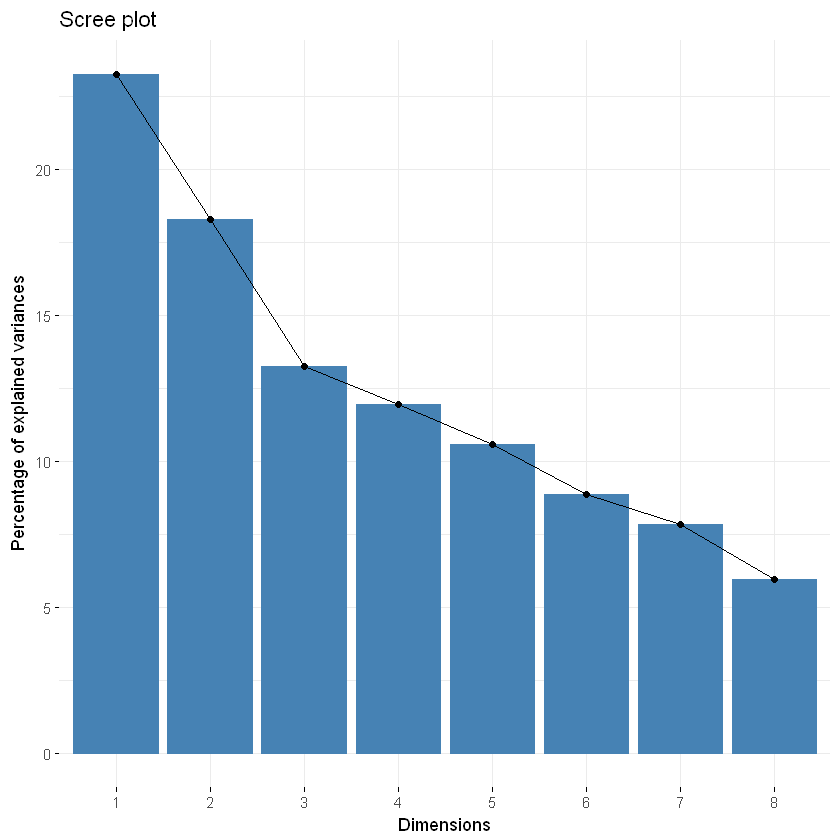

In [5]:
library(factoextra)
fviz_eig(HR_analytics)

The percentage of variance explained by each principal component is displayed in the plot

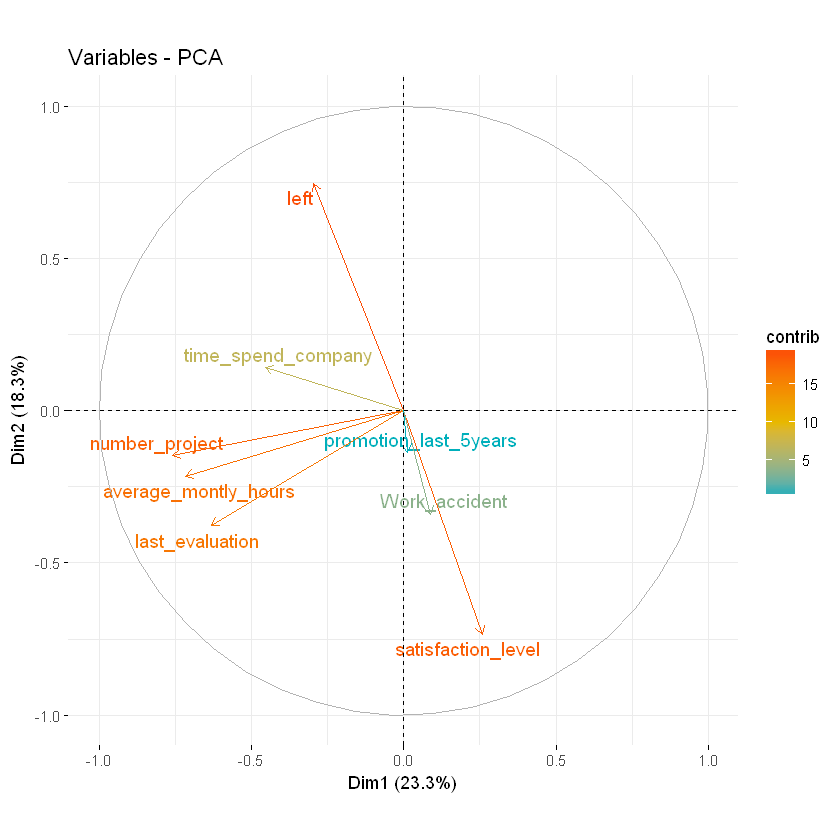

In [6]:
fviz_pca_var(HR_analytics,col.var = "contrib",repel = TRUE, gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"))

Positively correlated variables point to the same side in the plot.Negatively correalted variables point opposite sides in the plot.Hence number_project, average_monthly_hours and last_evaluation are positively correlated.Satisfaction level_left are negatively correlated.

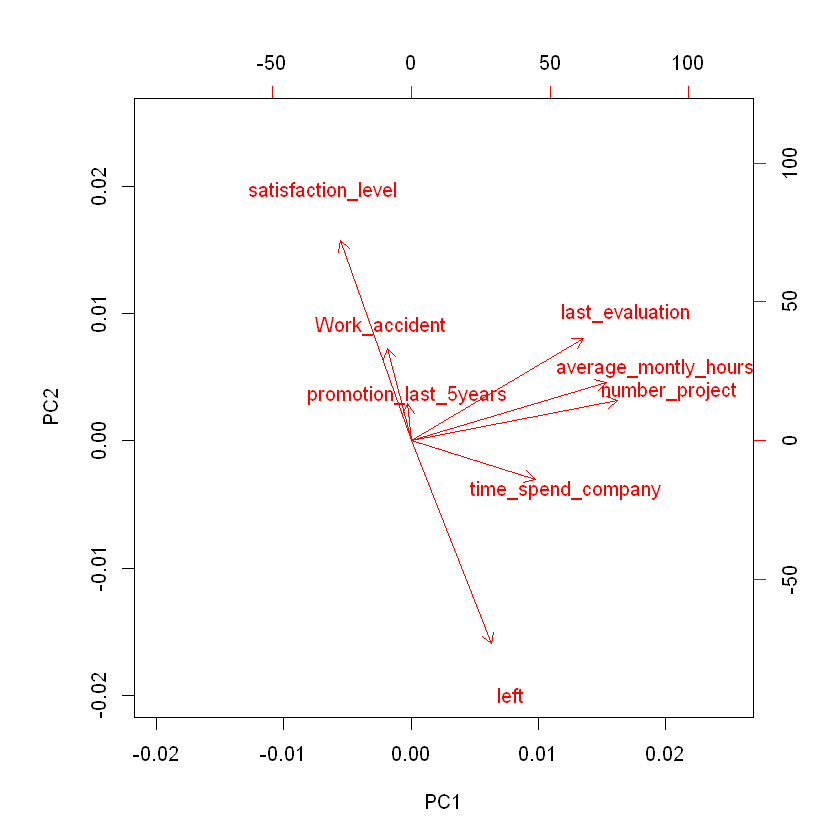

In [7]:
HR_analytics$rotation = -HR_analytics$rotation
HR_analytics$x =  -HR_analytics$x
biplot(HR_analytics, xlabs = rep("", nrow(HR)))

The plot shows the first two principal component scores and the loading verctors in a singple biplot display.The vectors show the relationship between variables and the prinicipal components. 

In [8]:
HR_analytics$rotation[,1:2]

,PC1,PC2
satisfaction_level,-0.189561861,0.6082581
last_evaluation,0.463637154,0.3122288
number_project,0.557047026,0.1225429
average_montly_hours,0.525595871,0.1785367
time_spend_company,0.333951324,-0.1170926
Work_accident,-0.064439228,0.2814044
left,0.216339403,-0.6163127
promotion_last_5years,-0.008708814,0.1135893


The first loading vector places most of its weight on satisfaction_level and much less weight on other variables.The second loading vector places its maximum weight on left .

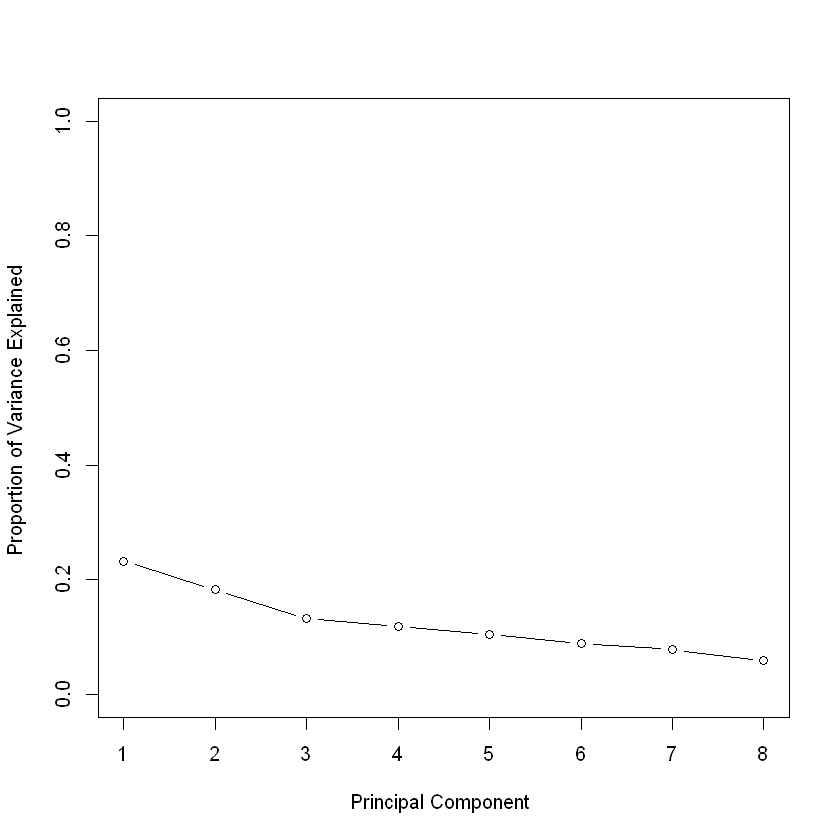

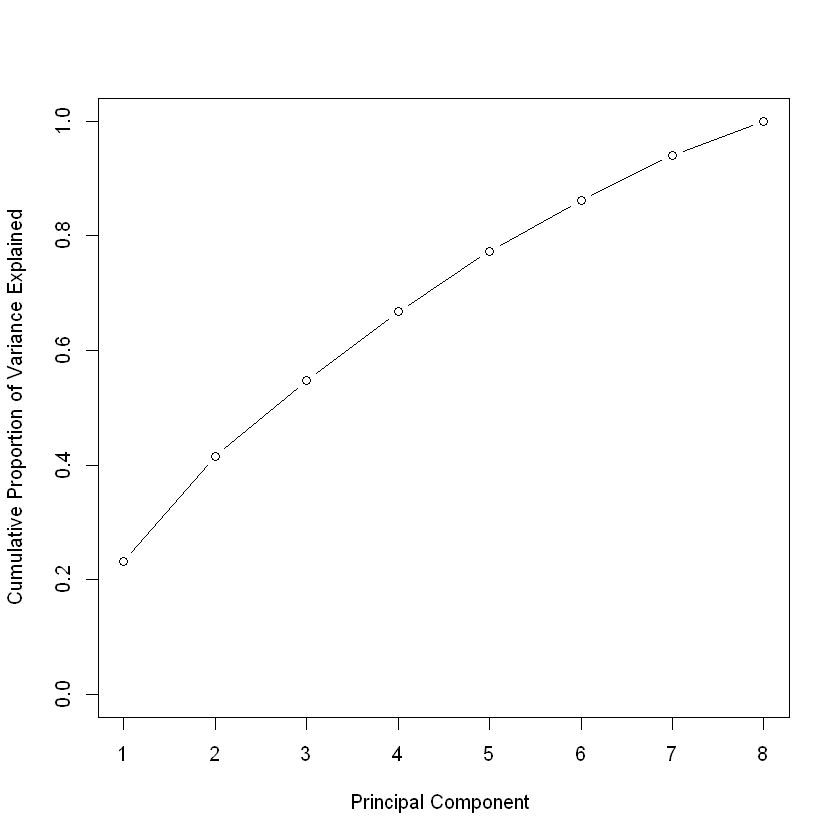

In [9]:
pca.var = HR_analytics$sdev ^ 2
prop.var = pca.var/sum(pca.var)
plot(prop.var , xlab="Principal Component ", ylab="Proportion of Variance Explained ", ylim=c(0,1),type = 'b')
plot(cumsum(prop.var), xlab="Principal Component ", ylab=" Cumulative Proportion of Variance Explained ", ylim=c(0,1),type = 'b')

Scree plot depicting the proportion of variance and the cumulative proportion of the variance explained by each of the eight principal components in the dataset.The first plot indicates that first component has the highest variance, value around 23% while the seventh component is around 0% of variance.So it indicates we should consider the first six components. The second plot explaining the cumulative proportion of variance indicates that first seven components contribute to 95% of variance .The beneficial is that we are able to reduce the variables by losing only 5% of the information.This is the power of dimentionality reduction.
